## Muhammad Nadeem
## 201980050
## Lab5Task

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


In [31]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [44]:
data.keys

<bound method NDFrame.keys of      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseA

In [45]:
data.values

array([[40,  1,  1, ..., 10,  2,  0],
       [49,  0,  2, ..., 20,  1,  1],
       [37,  1,  1, ..., 10,  2,  0],
       ...,
       [57,  1,  0, ..., 22,  1,  1],
       [57,  0,  1, ..., 10,  1,  1],
       [38,  1,  2, ..., 10,  2,  0]], dtype=int64)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             918 non-null    int64
 1   Sex             918 non-null    int32
 2   ChestPainType   918 non-null    int32
 3   RestingBP       918 non-null    int64
 4   Cholesterol     918 non-null    int64
 5   FastingBS       918 non-null    int64
 6   RestingECG      918 non-null    int32
 7   MaxHR           918 non-null    int64
 8   ExerciseAngina  918 non-null    int32
 9   Oldpeak         918 non-null    int64
 10  ST_Slope        918 non-null    int32
 11  HeartDisease    918 non-null    int64
dtypes: int32(5), int64(7)
memory usage: 68.3 KB


In [43]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,18.787582,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,10.077647,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,10.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,16.000000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,25.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,52.000000,2.000000,1.000000


In [32]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['ChestPainType'] = label_encoder.fit_transform(data['ChestPainType'])
data['RestingECG'] = label_encoder.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = label_encoder.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = label_encoder.fit_transform(data['ST_Slope'])
data['Oldpeak'] = label_encoder.fit_transform(data['Oldpeak'])

In [33]:
X = data.iloc[:,0:11]
y = data.iloc[:,11:]

In [34]:
scaler = StandardScaler()

In [35]:
X_scaled = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y, test_size = 0.3, random_state = 30)

In [37]:
modellm = LogisticRegression()
modellm.fit(X_train,y_train)
modellm.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8405797101449275

In [38]:
pca95 = PCA(0.95)

In [39]:
X_pca = pca95.fit_transform(X)

In [40]:
X_train, X_test, y_train,y_test = train_test_split(X_pca,y, test_size = 0.2, random_state = 30)

In [41]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7065217391304348

#### MDC(Model view controller) Django
MDT(Model View Template) Flask

## Task
1. Create a dataset of 1000 points in 4-dimensional
space. The points should be randomly generated and
should be distributed around the origin (0,0,0,0).
2. Perform PCA on the dataset to reduce the
dimensionality to 2.
3. Plot the original data points and the transformed
data points in a 2D scatter plot.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Set a random seed for reproducibility
np.random.seed(42)




In [52]:
# Task 1: Generate a dataset of 1000 points in 4-dimensional space
num_points = 1000
dimensionality = 4

# Generate random data centered around the origin
data = np.random.randn(num_points, dimensionality)



In [53]:
# Task 2: Perform PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)



Text(0, 0.5, 'Dimension 2')

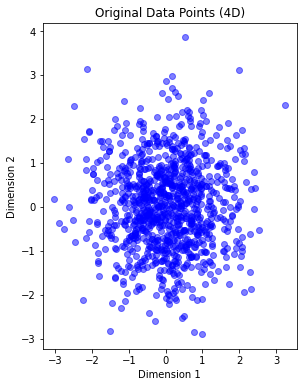

In [54]:
# Task 3: Plot the original and transformed data points in a 2D scatter plot
plt.figure(figsize=(10, 6))

# Plot original data points in 3D
ax1 = plt.subplot(121)
ax1.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.5)
ax1.set_title('Original Data Points (4D)')
ax1.set_xlabel('Dimension 1')
ax1.set_ylabel('Dimension 2')



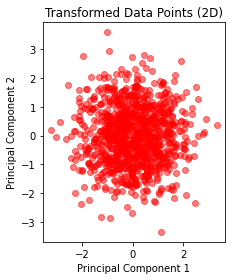

In [55]:
# Plot transformed data points in 2D after PCA
ax2 = plt.subplot(122)
ax2.scatter(transformed_data[:, 0], transformed_data[:, 1], c='red', alpha=0.5)
ax2.set_title('Transformed Data Points (2D)')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()